<br>

# Técnicas Matemáticas para Big Data - Project 2
<br><br>


GROUP NN:
- Mariana Guerra - Nº 107803 - 50% Work Participation
- Liliana Ribeiro - Nº 108713 - 50% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

Human Activity Recognition (HAR) is a fundamental problem in ubiquitous computing and wearable technology, with applications ranging from healthcare monitoring and fitness tracking to elderly care and smart home systems. The challenge lies in automatically identifying and classifying human activities based on sensor data collected from devices such as smartphones and smartwatches.

This project addresses the HAR problem using data from accelerometers and gyroscopes embedded in smartphones. The dataset contains time-series measurements from 30 volunteers performing six daily activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying. Each activity generates a sequence of 561 features extracted from the raw sensor signals, including time-domain and frequency-domain characteristics.

The primary objective is to develop an unsupervised learning approach using Hidden Markov Models to recognize these activities without relying on labeled data during training. This approach is particularly valuable in real-world scenarios where obtaining labeled data is expensive or impractical. By modeling activities as hidden states that generate observable sensor measurements, HMMs can capture the temporal dynamics and sequential patterns inherent in human movement.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

Our approach to Human Activity Recognition follows a three-stage pipeline: data preprocessing, dimensionality reduction, and unsupervised learning with Hidden Markov Models.

### 2.1 Data Preprocessing

The raw dataset consists of 7,352 training samples and 2,947 test samples, each containing 562 features (561 sensor measurements plus the activity label). We first separated the features (X) from the target labels (y), then applied standardization using -StandardScaler- to normalize all features to zero mean and unit variance. This normalization is crucial for PCA and HMM performance, ensuring that features with different scales contribute equally to the model.

### 2.2 Dimensionality Reduction with PCA

Given the high-dimensional nature of the data (561 features), we applied Principal Component Analysis (PCA) with a 90% explained variance threshold. After experimenting with different variance thresholds (including 95% and 85%), we determined that 90% provided the optimal balance between data compression and information retention. This resulted in a reduction from 561 to 64 principal components, achieving an 88.6% compression rate while retaining 90.13% of the original variance.

The first principal component alone captures approximately 52% of the total variance, indicating a dominant pattern in the sensor data. The subsequent components capture progressively smaller portions of variance, with the cumulative explained variance curve showing "log" shape. This dimensionality reduction serves multiple purposes: it eliminates noise and redundancy in the original features, reduces computational complexity for subsequent HMM training, and helps prevent overfitting by focusing on the most informative patterns.

### 2.3 Hidden Markov Model Architecture

We implemented a Gaussian Hidden Markov Model with K=6 hidden states (corresponding to the six activity classes) using the -hmmlearn- library. The model uses diagonal covariance matrices for computational efficiency and was trained for 100 iterations. Crucially, the HMM was trained in an unsupervised manner on the PCA-reduced features, without access to activity labels.

The HMM operates on the principle that observable sensor measurements are generated by underlying hidden states (activities). The model learns three key probability distributions:
- **Initial state probabilities (π)**: The probability of starting in each hidden state
- **Transition probabilities (A)**: The probability of moving from one state to another
- **Emission probabilities (B)**: The probability of observing particular sensor measurements in each state

After training, we used the Viterbi algorithm to decode the most likely sequence of hidden states for each observation. To map these hidden states to activity labels, we employed a majority voting strategy on the training set: each hidden state was assigned the activity label that appeared most frequently when that state was active.

### 2.4 Evaluation and Comparison

We evaluated the HMM's performance on the test set using accuracy, precision, recall, and F1-score metrics. Additionally, we trained a supervised Random Forest classifier on the same PCA-reduced data as a baseline for comparison. This allows us to quantify the performance gap between unsupervised and supervised approaches, providing insights into the effectiveness of the HMM for this task.

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

Human Activity Recognition (HAR) emerged as a core research area in machine learning aiming to identify physical activities from sensor data, such as accelerometers, gyroscopes, etc. Early works [1] introduced smartphone-based datasets such as the UCI HAR Dataset.

Traditional classification methods (Decision Trees, SVMs, and kNN) handled HAR as a static problem. However, such methods ignore temporal dependencies inherent to sensor data.
To capture sequential patterns, Hidden Markov Models (HMMs) [2] and Dynamic Bayesian Networks [3] became standard for time-dependent activity modeling.

Recent studies combine dimensionality reduction (e.g., PCA or autoencoders) with probabilistic models to balance accuracy and computational cost, which is critical for embedded or wearable applications.

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

The main algorithm is the Hidden Markov Model (HMM), a probabilistic framework designed to model systems where the underlying state sequence is hidden but generates observable outputs.

Each activity (e.g., Walking, Laying) is modeled by a separate HMM with three hidden substates, representing different phases or patterns within the activity.

The model is defined by:

π (startprob_) - initial probabilities of starting in each substate;

A (transmat_) - transition matrix between substates;

B (emissionprob_) - probabilities of emitting observed feature vectors.

The training process uses the Expectation-Maximization (EM) algorithm to iteratively estimate these parameters, maximizing the likelihood of observed sequences.
For classification, each trained HMM computes the log-likelihood $ logP(X∣model) $ for a test sequence, and the final label corresponds to the model with the highest likelihood.

The Viterbi algorithm is also used to infer the most probable sequence of hidden substates, helping visualize temporal structure and model stability.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [123]:
# pip install hmmlearn

In [124]:
import numpy as np #arrays and matrices operations
import pandas as pd #read CSVs files and data manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #for estetically pleasing visualizations

from pathlib import Path #to handle file paths

#preprocessing and dimensionality reduction
from sklearn.preprocessing import StandardScaler #data normalization
from sklearn.decomposition import PCA #principal component analysis for compressing variables

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #model evaluation metrics

from hmmlearn.hmm import GaussianHMM #Hidden Markov Model with Gaussian emissions (continuous observations)
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


sns.set(context="notebook", style="whitegrid", font_scale=1.1) #config visualization style
np.random.seed(0) #to garantee aleatory results reproducibility

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

The dataset used is the UCI Human Activity Recognition Using Smartphones Dataset [1].
It contains 10,299 observations collected from 30 volunteers performing six physical activities:

WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, and LAYING.

Each instance includes 561 numeric features derived from tri-axial accelerometer and gyroscope signals (time and frequency domain).
Examples of variables:

- tBodyAcc-mean()-X - mean body acceleration along the X-axis.

- tBodyGyro-std()-Z - standard deviation of body gyroscope along Z.

- fBodyAccJerkMag-mean() — mean magnitude of frequency-domain jerk signals.

The dataset is divided into:

- train.csv — 70% of the data for model training (7352 samples).

- test.csv — 30% for validation (2947 samples).

Before modeling:

- Features were standardized using StandardScaler.

- PCA was applied, retaining 64 components explaining ~90% of the total variance.

- The reduced vectors were used as the observable features for the HMM.

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

### 7.1. Data: Load, Separate X/Y (HAR) and Normalize

In [125]:
DATA = Path("human activity recognition")
if not DATA.exists():
    raise FileNotFoundError("Data folder not found. Please, download the dataset and place it in the 'human activity recognition' folder.")



train = pd.read_csv(DATA / "train.csv")
test = pd.read_csv(DATA / "test.csv")


#clean column names
train.columns = train.columns.str.strip()
test.columns  = test.columns.str.strip()

target_col = "Activity"

# X = measurements; y = activity labels
X_train = train.drop(columns=[target_col])
y_train = train[target_col].copy()

X_test = test.drop(columns=[target_col])
y_test = test[target_col].copy()

print("Shapes:", X_train.shape, X_test.shape)
print("Classes:", sorted(pd.unique(y_train)))

# Normalize data
scaler = StandardScaler()
X_train_s= scaler.fit_transform(X_train.values)
X_test_s = scaler.transform(X_test.values)

# # create PCA object
# pca_probe = PCA().fit(X_train_s)
# cum_var = np.cumsum(pca_probe.explained_variance_ratio_)
# n_pcs_90 = int(np.argmax(cum_var >= 0.90) + 1)
# print("PCA components (~90% variance):", n_pcs_90)

# # apply PCA
# pca = PCA(n_components=n_pcs_90, random_state=0)
# X_train_p = pca.fit_transform(X_train_s)
# X_test_p  = pca.transform(X_test_s)

# print("Shapes after PCA:", X_train_p.shape, X_test_p.shape)




Shapes: (7352, 562) (2947, 562)
Classes: ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [126]:
print("EXPLORATORY DATA ANALYSIS")

print(f"\n Feature Statistics:")
print(f"   Number of features: {X_train.shape[1]}")
print(f"   Overall mean: {X_train.values.mean():.4f}")
print(f"   Overall standard deviation: {X_train.values.std():.4f}")
print(f"   Min: {X_train.values.min():.4f}")
print(f"   Max: {X_train.values.max():.4f}")

# Class distribution
print("\n Class Distribution (Train):")
class_counts = y_train.value_counts().sort_index()
for activity, count in class_counts.items():
    percentage = (count / len(y_train)) * 100
    print(f"   {activity:25s}: {count:4d} ({percentage:5.1f}%)")

print(f"\n Normalization Data:")
print(f"   Train - Média: {X_train_s.mean():.6f}, Std: {X_train_s.std():.6f}")
print(f"   Test - Média: {X_test_s.mean():.6f}, Std: {X_test_s.std():.6f}")


EXPLORATORY DATA ANALYSIS

 Feature Statistics:
   Number of features: 562
   Overall mean: -0.4765
   Overall standard deviation: 0.9976
   Min: -1.0000
   Max: 30.0000

 Class Distribution (Train):
   LAYING                   : 1407 ( 19.1%)
   SITTING                  : 1286 ( 17.5%)
   STANDING                 : 1374 ( 18.7%)
   WALKING                  : 1226 ( 16.7%)
   WALKING_DOWNSTAIRS       :  986 ( 13.4%)
   WALKING_UPSTAIRS         : 1073 ( 14.6%)

 Normalization Data:
   Train - Média: 0.000000, Std: 1.000000
   Test - Média: -0.011986, Std: 0.928903


### 7.2. Data: Dimensionality Reduction with PCA

DIMENSIONALITY REDUCTION (PCA)
   Original: 562 features
   Reduced: 64 components
   Explained variance: 90.13%
   Compression: 88.6%


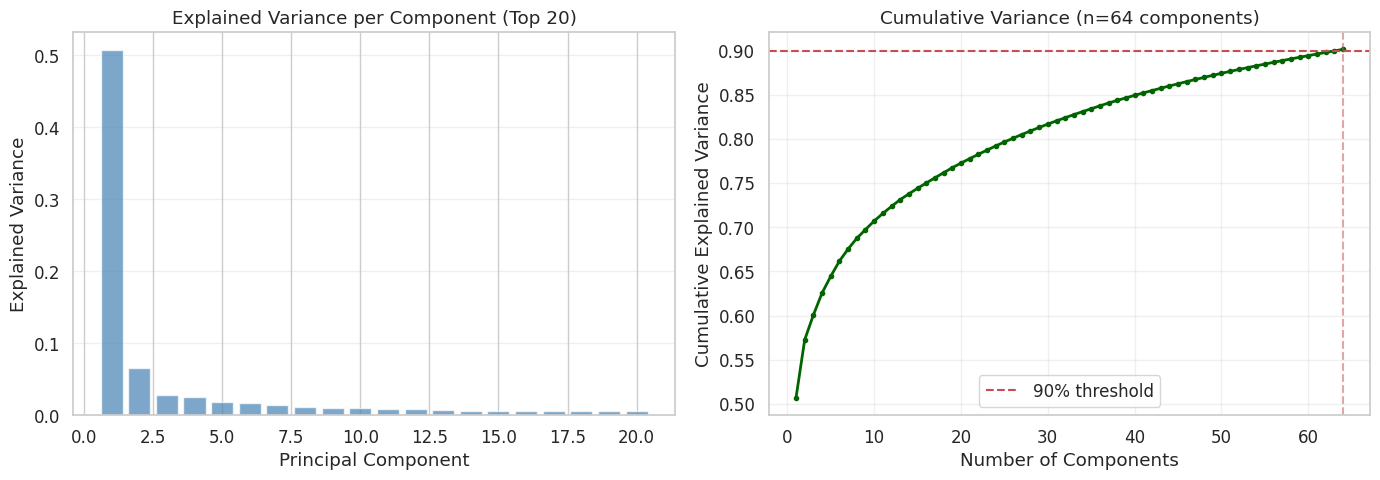


 Shapes after PCA:
   X_train_p: (7352, 64)
   X_test_p: (2947, 64)


In [127]:
print("DIMENSIONALITY REDUCTION (PCA)")

# PCA with 90% explained variance
variance_threshold = 0.90
pca = PCA(n_components=variance_threshold, random_state=42)

X_train_p = pca.fit_transform(X_train_s)
X_test_p = pca.transform(X_test_s)

n_components = pca.n_components_
actual_variance = pca.explained_variance_ratio_.sum()

print(f"   Original: {X_train.shape[1]} features")
print(f"   Reduced: {n_components} components")
print(f"   Explained variance: {actual_variance:.2%}")
print(f"   Compression: {(1 - n_components/X_train.shape[1])*100:.1f}%")

"""   GRAPHS """

# graphs variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# individual variance
axes[0].bar(range(1, min(21, len(explained_variance)+1)), 
            explained_variance[:20], 
            color='steelblue', alpha=0.7)
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Explained Variance")
axes[0].set_title("Explained Variance per Component (Top 20)")
axes[0].grid(axis='y', alpha=0.3)

# cumulative variance
axes[1].plot(range(1, len(cumulative_variance)+1), 
             cumulative_variance, 
             marker='o', markersize=3, linewidth=2, color='darkgreen')
axes[1].axhline(y=variance_threshold, color='r', linestyle='--', 
                label=f'{variance_threshold:.0%} threshold')
axes[1].axvline(x=n_components, color='r', linestyle='--', alpha=0.5)
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Cumulative Explained Variance")
axes[1].set_title(f"Cumulative Variance (n={n_components} components)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Shapes after PCA:")
print(f"   X_train_p: {X_train_p.shape}")
print(f"   X_test_p: {X_test_p.shape}")


### 7.3. Hiden Markov Model training
For each activity class, a Gaussian Hidden Markov Model (HMM) is trained separately. Each model learns the internal dynamics (transitions) and emission probabilities that best represent the sequences of observations for that activity.


In [128]:
# combine PCA-reduced features with activity labels
train_pca = pd.DataFrame(X_train_p)
train_pca["Activity"] = y_train.values
test_pca = pd.DataFrame(X_test_p)
test_pca["Activity"] = y_test.values

classes = sorted(train_pca["Activity"].unique()) # list of activity classes

# model hyperparameters
n_substates = 3  # internal hiden states per activity
cov_type = "diag"  # covariance for robustness
n_iter = 60  # EM iterations

# train one GaussianHMM per activity
models = {}
for cls in classes:
    X_cls = train_pca[train_pca["Activity"] == cls].drop(columns=["Activity"]).values
    hmm = GaussianHMM(n_components=n_substates, covariance_type=cov_type, n_iter=n_iter, random_state=0, verbose=False)
    hmm.fit(X_cls) 
    models[cls] = hmm

# Inspect π and A of one trained model
ex_cls = classes[0]
mdl = models[ex_cls]
print(f"[{ex_cls}] π (startprob_):\n", np.round(mdl.startprob_, 3))
print(f"[{ex_cls}] A (transmat_):\n", np.round(mdl.transmat_, 3))
print(f"[{ex_cls}] Emissões: means_.shape={mdl.means_.shape} (média por sub-estado)\n")


[LAYING] π (startprob_):
 [1. 0. 0.]
[LAYING] A (transmat_):
 [[0.874 0.042 0.084]
 [0.525 0.475 0.   ]
 [0.108 0.025 0.867]]
[LAYING] Emissões: means_.shape=(3, 64) (média por sub-estado)



#### 7.3.1. Likelihood-Based Classification

In [129]:
def predict_rowwise(models, X_np, classes):
    preds = []
    for i in range(X_np.shape[0]):
        xi = X_np[i:i+1, :]  #observation i
        scores = {c: models[c].score(xi) for c in classes}  #log-likelihoods
        preds.append(max(scores, key=scores.get))  #class with highest likelihood
    return np.array(preds)

Xte_np = test_pca.drop(columns=["Activity"]).values
y_pred = predict_rowwise(models, Xte_np, classes)

#### 7.3.2. Viterbi algorithm - most probable hidden state sequence

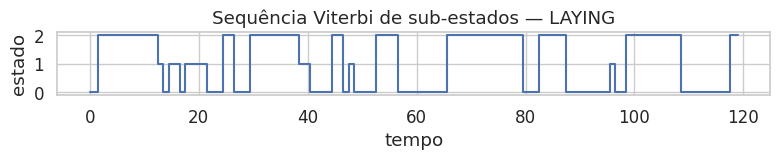

In [130]:
seq_ex = train_pca[train_pca['Activity']==ex_cls].drop(columns=['Activity']).values[:120]
states_ex = models[ex_cls].predict(seq_ex)

plt.figure(figsize=(8,1.8))
plt.plot(states_ex, drawstyle="steps-mid")
plt.yticks(range(n_substates)); plt.xlabel("tempo"); plt.ylabel("estado")
plt.title(f"Sequência Viterbi de sub-estados — {ex_cls}")
plt.tight_layout(); plt.show()

“The plot below shows the most probable sequence of hidden substates for the activity LAYING, as decoded by the Viterbi algorithm.
Each state (0–2) corresponds to a latent phase within the activity, and transitions between them illustrate how the model captures internal temporal dynamics.
Smooth, recurrent transitions indicate coherent structure, whereas erratic changes would suggest weak state separation.”

### 7.4. Evaluation

Acuracy (sample by sample): 0.680

Classification Report:
                     precision    recall  f1-score   support

            LAYING      0.783     0.939     0.854       537
           SITTING      0.563     0.081     0.142       491
          STANDING      0.610     0.970     0.749       532
           WALKING      0.742     0.885     0.807       496
WALKING_DOWNSTAIRS      0.553     0.852     0.671       420
  WALKING_UPSTAIRS      0.993     0.310     0.472       471

          accuracy                          0.680      2947
         macro avg      0.707     0.673     0.616      2947
      weighted avg      0.709     0.680     0.621      2947



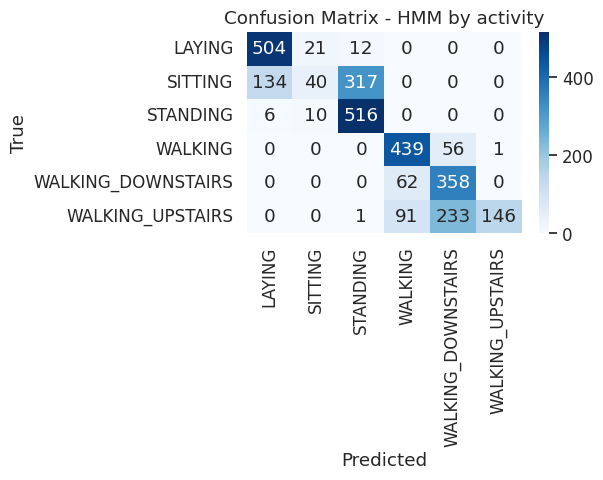

In [131]:
acc = accuracy_score(y_test, y_pred)
print(f"Acuracy (sample by sample): {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(6.2,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("Confusion Matrix - HMM by activity")
plt.tight_layout(); plt.show()

Training HMM...

 State → Activity Mapping:
------------------------------------------------------------
State    →   Activity             Samples    Purity
------------------------------------------------------------
0        →   WALKING_DOWNSTAIRS   555         35.9%
1        →   WALKING_UPSTAIRS     872         85.3%
2        →   WALKING              697         95.4%
3        →   LAYING               2114        43.1%
4        →   WALKING_DOWNSTAIRS   1310        49.8%
5        →   SITTING              1804        38.7%
------------------------------------------------------------

 Unsupervised Global HMM — Accuracy: 0.549
                    precision    recall  f1-score   support

            LAYING       0.40      0.65      0.49       537
           SITTING       0.42      0.55      0.48       491
          STANDING       0.00      0.00      0.00       532
           WALKING       0.96      0.57      0.72       496
WALKING_DOWNSTAIRS       0.49      0.84      0.62       420
  WA

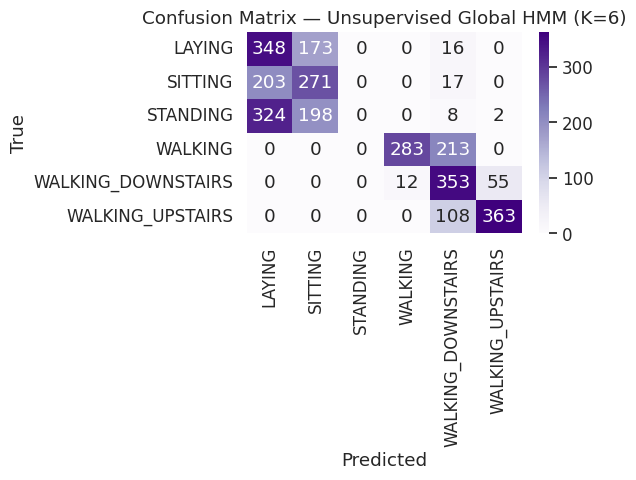


Start probabilities (π): [0. 0. 0. 1. 0. 0.]
Transition matrix (A):
 [[0.664 0.02  0.004 0.166 0.14  0.005]
 [0.011 0.925 0.    0.023 0.04  0.   ]
 [0.    0.009 0.936 0.002 0.052 0.   ]
 [0.02  0.    0.009 0.829 0.006 0.136]
 [0.071 0.036 0.015 0.006 0.872 0.   ]
 [0.023 0.    0.002 0.131 0.003 0.841]]


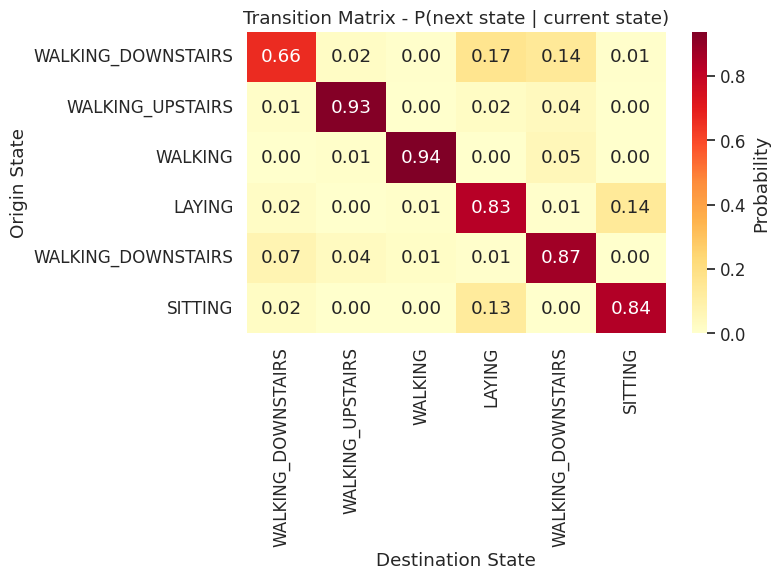


COMPARISON WITH SUPERVISED BASELINE

Results:
  HMM (unsupervised):      54.9%
  Random Forest (supervised): 87.5%
  Gap:                            32.6%


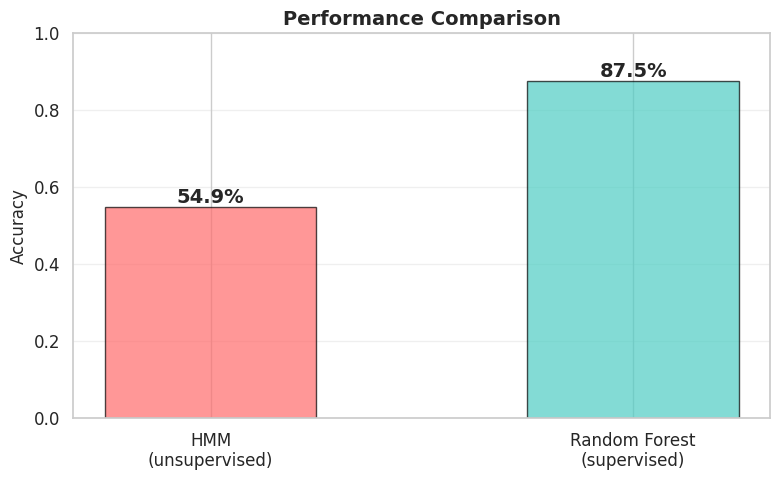

In [132]:
# ==========================================
# Unsupervised Global HMM (K=6, GaussianHMM)
# ==========================================
"""
We now train a single Gaussian HMM with K=6 hidden states on the PCA-reduced,
standardized features, ignoring the activity labels during training.
This mirrors the classical HMM setup: observations are visible; the state is hidden.
After training, we map hidden states to activity labels via majority vote on the train set.
"""
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

K = 6
hmm_global = GaussianHMM(
    n_components=K,
    covariance_type="diag",
    n_iter=100,
    random_state=0,
    verbose=False
)

print("Training HMM...")
hmm_global.fit(X_train_p)

# Decode states
states_tr = hmm_global.predict(X_train_p)
states_te = hmm_global.predict(X_test_p)

# Map hidden states -> activity labels
state_to_label = {}
for s in range(K):
    labels_s = y_train[states_tr == s]
    if len(labels_s) == 0:
        state_to_label[s] = y_train.mode().iloc[0]
    else:
        state_to_label[s] = Counter(labels_s).most_common(1)[0][0]

# Show mapping with purity
print("\n State → Activity Mapping:")
print("-" * 60)
print(f"{'State':<8} {'→':<3} {'Activity':<20} {'Samples':<10} {'Purity'}")
print("-" * 60)
for s in range(K):
    labels_s = y_train[states_tr == s]
    if len(labels_s) > 0:
        most_common = Counter(labels_s).most_common(1)[0]
        purity = most_common[1] / len(labels_s)
        print(f"{s:<8} {'→':<3} {state_to_label[s]:<20} {len(labels_s):<10} {purity:>6.1%}")
    else:
        print(f"{s:<8} {'→':<3} {state_to_label[s]:<20} {'RARE!':<10}")
print("-" * 60)

# Apply mapping
y_pred_global = pd.Series(states_te).map(state_to_label).values

# Evaluate
acc_global = accuracy_score(y_test, y_pred_global)
print(f"\n Unsupervised Global HMM — Accuracy: {acc_global:.3f}")
print(classification_report(y_test, y_pred_global, zero_division=0))

# Confusion matrix
cm_global = confusion_matrix(y_test, y_pred_global, labels=sorted(y_train.unique()))
plt.figure(figsize=(6.2, 5))
sns.heatmap(cm_global, annot=True, fmt="d", cmap="Purples",
            xticklabels=sorted(y_train.unique()),
            yticklabels=sorted(y_train.unique()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Unsupervised Global HMM (K=6)")
plt.tight_layout()
plt.show()

# Transition matrix
print("\nStart probabilities (π):", np.round(hmm_global.startprob_, 3))
print("Transition matrix (A):\n", np.round(hmm_global.transmat_, 3))

# Visualize transition matrix
plt.figure(figsize=(8, 6))
activity_labels = [state_to_label[s] for s in range(K)]
sns.heatmap(hmm_global.transmat_, 
            annot=True, 
            fmt=".2f", 
            cmap="YlOrRd",
            xticklabels=activity_labels,
            yticklabels=activity_labels,
            cbar_kws={'label': 'Probability'})
plt.title("Transition Matrix - P(next state | current state)")
plt.xlabel("Destination State")
plt.ylabel("Origin State")
plt.tight_layout()
plt.show()

# Comparison with supervised baseline
print("\n" + "="*60)
print("COMPARISON WITH SUPERVISED BASELINE")
print("="*60)

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_p, y_train)
y_pred_rf = rf.predict(X_test_p)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nResults:")
print(f"  HMM (unsupervised):      {acc_global:.1%}")
print(f"  Random Forest (supervised): {acc_rf:.1%}")
print(f"  Gap:                            {(acc_rf - acc_global):.1%}")

# Comparative plot
fig, ax = plt.subplots(figsize=(8, 5))
models = ['HMM\n(unsupervised)', 'Random Forest\n(supervised)']
accs = [acc_global, acc_rf]
colors = ['#FF6B6B', '#4ECDC4']

bars = ax.bar(models, accs, color=colors, alpha=0.7, edgecolor='black', width=0.5)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Performance Comparison", fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bar, acc in zip(bars, accs):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.1%}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


<br><br>

## 8. Analysis of Example 1 [3,0 valor]

Normal case

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

Edge case

<br><br>
## 10. Pros and cons of the approach [2,0 valor]


Cada metodo.

HMM funciona bem para atividades dinâmicas (caminhar)
Tem dificuldade em separar atividades estáticas (sitting vs standing)

<br><br>
## 11. Future improvements [2,0 valor]

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>

[1] Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013). A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21st European Symposium on Artificial Neural Networks (ESANN)

[2] Rabiner, L. R. (1989). A tutorial on Hidden Markov Models and selected applications in speech recognition. Proceedings of the IEEE, 77(2), 257–286

[3] Murphy, K. P. (2002). Dynamic Bayesian Networks: Representation, Inference and Learning. PhD Thesis, UC Berkeley
